Accuracy: 78.07%

             precision    recall  f1-score   support

   Negative       0.79      0.77      0.78      2693
   Positive       0.77      0.80      0.78      2615

avg / total       0.78      0.78      0.78      5308



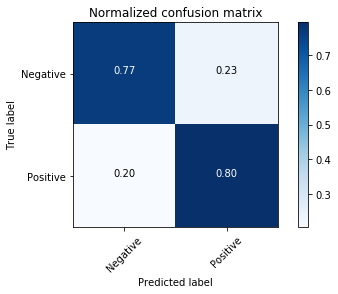

"\nProject:\nDefault = 0.668168168168\n\nSandar's (After replacing -1 with 0)\n\nAccuracy: 78.07%\n\n             precision    recall  f1-score   support\n\n   Negative       0.79      0.77      0.78      2693\n   Positive       0.77      0.80      0.78      2615\n\navg / total       0.78      0.78      0.78      5308\n\n"

In [2]:
#encoding: utf-8
# Multinomial naiive bayes


'''    imports    '''
# -*- coding: utf-8 -*-

import sklearn, csv, re, time, itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import read_csv

from sklearn import decomposition, model_selection
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.tree import DecisionTreeClassifier

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def test(model):
    labels = ["Negative","Positive"]
    start = time.time()

    model.fit(X, Y)
    y_predict = model.predict(X_test)
    
    # accuracy
    print("Accuracy: "+str(float("{0:.2f}".format(accuracy_score(y_test, y_predict)*100)))+"%\n")
    
    # classification report
    print(classification_report(y_test, y_predict, target_names=labels))

    # confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_predict)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=labels, normalize=True, title='Normalized confusion matrix')
    plt.show()

filename = 'all-words-no-review2.csv'

dataframe = read_csv(filename, engine='python')
array = dataframe.values
X = array[:, 1:]
Y = array[:, 0]
clf = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=7)
test(clf)

'''
Project:
Default = 0.668168168168

Sandar's (After replacing -1 with 0)

Accuracy: 78.07%

             precision    recall  f1-score   support

   Negative       0.79      0.77      0.78      2693
   Positive       0.77      0.80      0.78      2615

avg / total       0.78      0.78      0.78      5308

'''


Accuracy: 78.07%

             precision    recall  f1-score   support

   Negative       0.79      0.77      0.78      2693
   Positive       0.77      0.80      0.78      2615

avg / total       0.78      0.78      0.78      5308



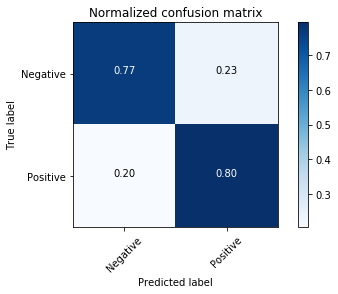

In [8]:
model1 = MultinomialNB()
test(model1)

Accuracy: 98.04%

             precision    recall  f1-score   support

   Negative       0.98      0.98      0.98      2693
   Positive       0.98      0.98      0.98      2615

avg / total       0.98      0.98      0.98      5308



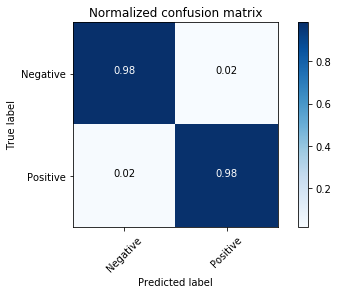

In [7]:
model2 = RandomForestClassifier(random_state=0)
test(model2)

Accuracy: 79.9%

             precision    recall  f1-score   support

   Negative       0.79      0.82      0.80      2693
   Positive       0.81      0.78      0.79      2615

avg / total       0.80      0.80      0.80      5308



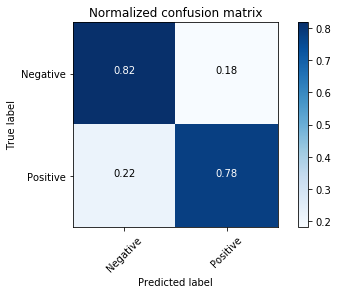

In [4]:
model3 = LogisticRegression(C=0.9)
test(model3)

Accuracy: 80.75%

             precision    recall  f1-score   support

   Negative       0.80      0.83      0.81      2693
   Positive       0.82      0.79      0.80      2615

avg / total       0.81      0.81      0.81      5308



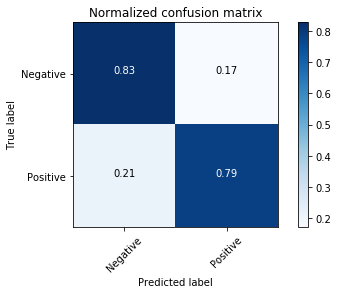

In [6]:
model4 = SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
test(model4)

Accuracy: 82.31%

             precision    recall  f1-score   support

   Negative       0.80      0.86      0.83      2693
   Positive       0.85      0.78      0.81      2615

avg / total       0.82      0.82      0.82      5308



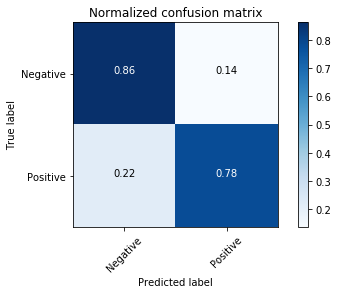

In [9]:
# kfold = model_selection.KFold(n_splits=10, random_state=7)
estimators = [
    ('model1', model1),
    ('model2', model2),
    ('model3', model3),
    ('model4', model4),
]

ensemble = VotingClassifier(estimators, voting='hard', n_jobs=-1)
test(ensemble)